# Vehicle Sensor Data: Exploration and Cleaning


**Objective:** Load the raw sensor data from `data/raw/`, inspect it for issues, clean it, and save the processed version to `data/processed/` for the next step in the pipeline.


---

**Instructions:**

1. Place your raw sensor data CSV file in the `data/raw/` folder.
2. Run each cell in order to clean and prepare your data for analysis.
3. Review the outputs and adjust cleaning steps as needed for your dataset.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Step 1: Load Raw Data

Check that your raw data file exists and load it into a DataFrame.

In [3]:
raw_data_path = '../data/raw/sensor_data.csv'

if not os.path.exists(raw_data_path):

    raise FileNotFoundError(f"Raw data file not found at {raw_data_path}. Please check the path and filename.")

df = pd.read_csv(raw_data_path)

print(f"Loaded data with shape: {df.shape}")

Loaded data with shape: (60439, 33)


C:\Users\Asus\AppData\Local\Temp\ipykernel_13604\4035921359.py:7: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path)


### Step 2: Initial Exploration

Inspect the first few rows, column types, and missing values.

In [4]:
print('--- First 5 Rows ---')

print(df.head())

print('\n--- Data Info ---')

df.info()

print('\n--- Column Types ---')

print(df.dtypes)

print('\n--- Missing Values Check ---')

print(df.isnull().sum())

print('\n--- Basic Statistics ---')

print(df.describe(include='all'))

--- First 5 Rows ---
      TIMESTAMP       MARK  MODEL  CAR_YEAR ENGINE_POWER AUTOMATIC VEHICLE_ID  \
0  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
1  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
2  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
3  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
4  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   

   BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP FUEL_LEVEL  ... THROTTLE_POS  \
0                     100.0                 80.0     48,60%  ...          25%   
1                     100.0                 80.0     48,60%  ...          25%   
2                     100.0                 80.0     48,60%  ...          25%   
3                     100.0                 80.0     48,60%  ...          25%   
4                     100.0                 80.0     48,60%  ...          25%   

     

### Step 3: Data Cleaning

- Handle missing values (numeric: fill with mean, categorical: fill with mode).

- Detect and handle outliers (optional, visualized below).

- Convert column types if needed.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13604\2619876685.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13604\2619876685.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,


--- Missing Values After Cleaning ---
TIMESTAMP                      0
MARK                           0
MODEL                          0
CAR_YEAR                       0
ENGINE_POWER                   0
AUTOMATIC                      0
VEHICLE_ID                     0
BAROMETRIC_PRESSURE(KPA)       0
ENGINE_COOLANT_TEMP            0
FUEL_LEVEL                     0
ENGINE_LOAD                    0
AMBIENT_AIR_TEMP               0
ENGINE_RPM                     0
INTAKE_MANIFOLD_PRESSURE       0
MAF                            0
LONG TERM FUEL TRIM BANK 2     0
FUEL_TYPE                      0
AIR_INTAKE_TEMP                0
FUEL_PRESSURE                  0
SPEED                          0
SHORT TERM FUEL TRIM BANK 2    0
SHORT TERM FUEL TRIM BANK 1    0
ENGINE_RUNTIME                 0
THROTTLE_POS                   0
DTC_NUMBER                     0
TROUBLE_CODES                  0
TIMING_ADVANCE                 0
EQUIV_RATIO                    0
MIN                            0
HOUR

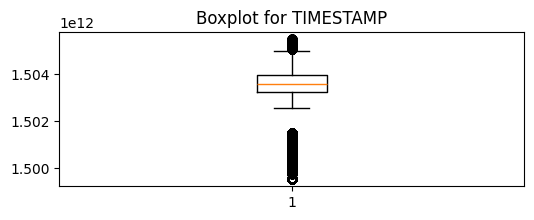

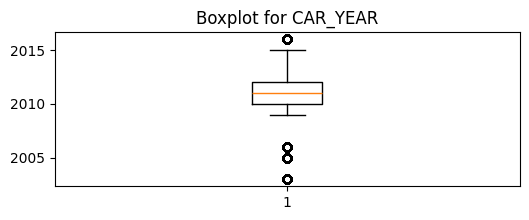

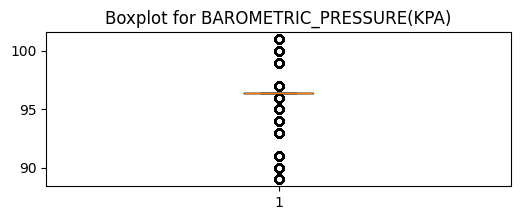

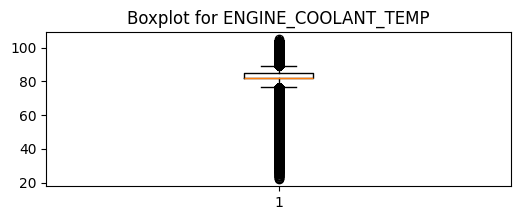

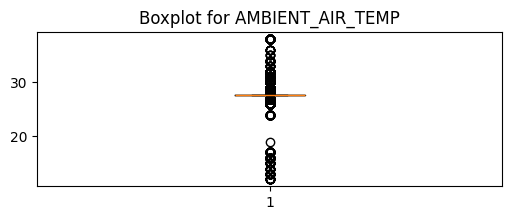

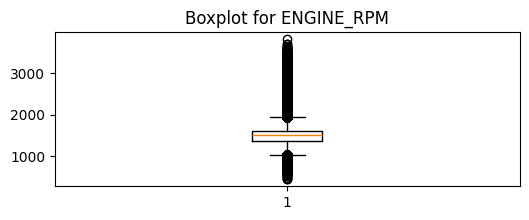

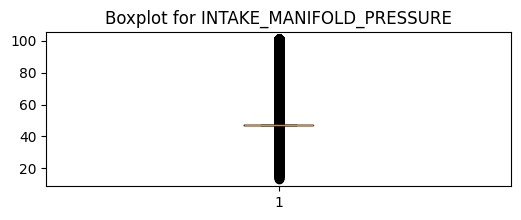

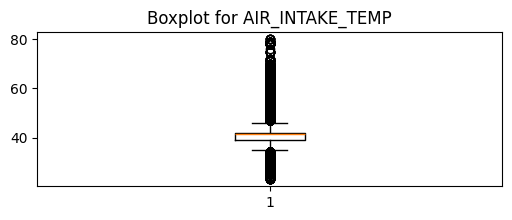

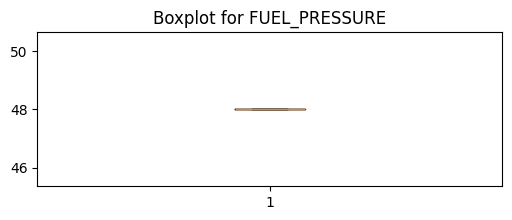

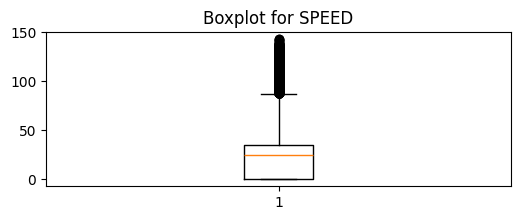

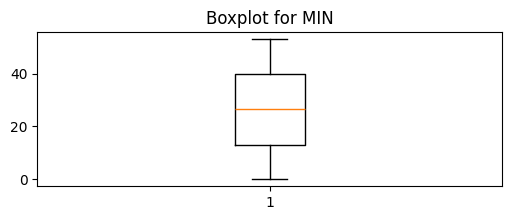

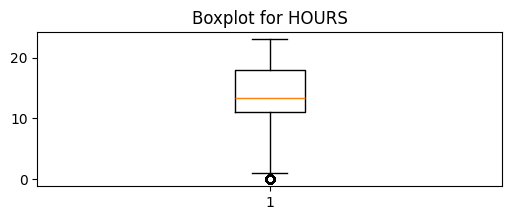

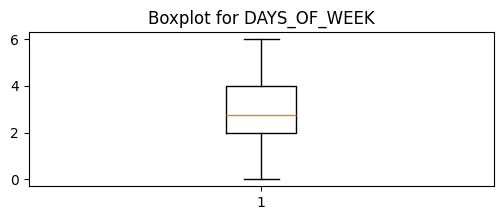

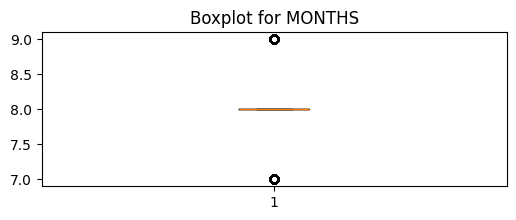

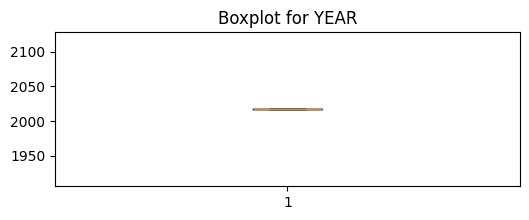

In [5]:
# Fill missing values: numeric with mean, categorical with mode

for col in df.columns:

    if df[col].dtype in [np.float64, np.int64]:

        df[col].fillna(df[col].mean(), inplace=True)

    else:

        df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else '', inplace=True)



print('\n--- Missing Values After Cleaning ---')

print(df.isnull().sum())



# Optional: Outlier detection for numeric columns

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:

    plt.figure(figsize=(6,2))

    plt.boxplot(df[col].dropna())

    plt.title(f'Boxplot for {col}')

    plt.show()

### Step 4: Save Processed Data

Save the cleaned DataFrame to the processed data folder. Review the output file before loading to the database.

In [6]:
processed_folder_path = '../data/processed/'

os.makedirs(processed_folder_path, exist_ok=True) # Ensure the directory exists

processed_file_path = os.path.join(processed_folder_path, 'cleaned_sensor_data.csv')

df.to_csv(processed_file_path, index=False)

if os.path.exists(processed_file_path):

    print(f'Cleaned data successfully saved to {processed_file_path}')

else:

    print('Error: Cleaned data file was not saved.')

Cleaned data successfully saved to ../data/processed/cleaned_sensor_data.csv
